# Jupyter tutorial (part 1)

Welcome to the Jupyter tutorial for SPMS faculty.  This tutorial will teach you how to use Jupyter to set up web-based course notes with pretty formatting, $\LaTeX$ mathematical equations, interactive graphs, HTML5 animations, and embeddable YouTube videos.

The tutorial is divided into three parts:
* Part 1 describes the basics of using Jupyter.
* Part 2 describes how to program interactive graphs using the Widget library.
* Part 3 describes advanced topics: customizing Python and CSS defaults, server deployment (including version control), and exporting to $\LaTeX$/PDF.

## Using Jupyter

### Getting started

If you're running GNU/Linux, you should be able to install Jupyter using the standard package manager.  On all other operating systems, it is easiest to install the [Anaconda distribution](https://www.continuum.io/downloads). This is a Python distribution that contains Jupyter and other commonly-required modules like Scientific Python (Scipy). For other installation options, [see here](https://jupyter.readthedocs.io/en/latest/install.html).

In all cases, I highly recommend choosing the **Python 3** version. Nowadays, Python 2 is meant for legacy code, and all new code ought to be written in Python 3 by default.

From now on, we'll assume you're reading this tutorial in a Jupyter notebook session, running within a browser on your computer.

### Basic Jupyter notebook usage

A Jupyter notebook is a document in which human-language text can be interspersed with computer code.  It is divided into discrete segments, called **cells**.  Each cell is either a **Markdown cell** (containing formatted human-language text) or a **code cell** (containing code).  This cell, for instance, is a Markdown cell.  As for code cells, their purpose can be instructional (e.g., for students to study and modify in a programming class), or merely functional (e.g., for embedding YouTube videos in the notebook).

When you first open a Jupyter notebook, all the cells are set up for viewing.  You are in **Command Mode**, which lets you navigate and view the notebook, using the scroll bar or mouse-wheel.  You can also left-click on a cell to select it; the currently selected cell is indicated by a highlighted border and left margin.

Still in Command Mode, you can *run* the program in a code cell by selecting it, and then using the <code>Cell &rightarrow; Run Cells</code> menu item.  (Instead of the menu item, you can also use the "run" tool bar item, or the keyboard shortcut `Ctrl-Enter`.)  Try it on the code cell below:

In [1]:
from ipywidgets import interact, ToggleButtons

def test_msg(x):
    print('We are: ' + x)

interact(test_msg, x = ToggleButtons(description="Are we cool?", options=['cool', 'uncool']));

We are: uncool


Running this program generates two interactive buttons, which you can click on to generate a silly message. For now, don't worry about understanding the code; we'll cover that material later.

To change the contents of a cell, select it and type <code>Enter</code> (or just left-click on the text area if it's a code cell). This brings you into **Edit Mode**.  After making whatever changes you like, exit Edit Mode by typing `Ctrl-Enter`, or the <code>Cell &rightarrow; Run Cells</code> menu option, or the "run" tool bar item.

Go ahead and try editing this Markdown cell. Then return to Command Mode to see your changes take effect. 

### Important Keyboard Shortcuts<a name="shortcuts"></a>

Jupyter provides an extensive list of keyboard shortcuts for both Command Mode and Edit Mode.  Type `h` (for help) in Command Mode to show them. Some of the most useful ones are summarized here:

**In Command Mode**:

* `Enter` : Enter Edit Mode.
* `Ctrl-Enter` : Run cell.
* `a` : Insert new cell above.
* `b` : Insert new cell below.

**In Edit Mode**:

* `Ctrl-Enter` : Finish editing; run/display cell and go to Command Mode.
* `Ctrl-Shift-Minus` : Split the markdown cell at the current position.
* `Ctrl-x`/`Ctrl-c`/`Ctrl-v`/`Ctrl-z` : Cut/copy/paste/undo.

## Editing basics: Markdown cells

In Jupyter notebooks, human-language text should be put in **markdown cells**. Markdown is a markup language that's much simpler to read and write than HTML (at the expense of precision and power).  It makes it very easy to implement 99% of the formatting/highlighting needed in a typical Jupyter document.  When you run a Markdown cell (e.g. typing `Ctrl-Enter` from Edit Mode), the Jupyter notebook converts the Markdown into HTML, and displays it nicely in the browser.

There are lots of introductions to Markdown on the web.  [This tutorial](https://guides.github.com/features/mastering-markdown/), for instance, is pretty good.  Here, we'll just give a whirlwind tour.  Simply enter Edit Mode and see how the various formatting elements are written in Markdown:

### Section/Subsection titles (lines beginning with # characters)
#### Also subsubsections...
##### Also subsubsubsections, etc...

Text can be highlighted by surrounding with asterisks: *one asterisk for emphasis*, **two asterisks for strong statements**, and ***three for strong emphases***.

1. To make ordered lists:
2. Just start the line with a number, followed by a period.
3. Any non-conforming line terminates the list.
4. This syntax doesn't allow for sub-lists.

You can also use the HTML `<ol>` markup to implement more complex lists (this allows for sublists, etc.)  Likewise,

* To make bullet-point lists:
* Use lines beginning with `*`.
* This syntax doesn't allow for sub-lists.

You can use the HTML `<ul>` markup to implement more complex unordered lists.

You can include hyperlinks, [like this one to jupyter.org](http://jupyter.org/).  You can include internal hyperlinks within the same Jupyter document, [like this one to the **Shortcuts** cell](#shortcuts).  (The destination to jump to was defined by adding the special tag `<a name="shortcuts"></a>` in the target Markdown cell; this tag is hidden when displaying the Markdown cell.)  You can even link to [other Jupyter notebooks on the same host](jupyter_tutorial_02.ipynb#advanced_floatslider).

To include images, use the HTML `<img>` tag:

<img src="honeycomb.png" alt="Example image: a honeycomb lattice.">

Markdown can also include $\LaTeX$ expressions.  These can be embedded into text by surrounding them with `$` characters, like this: $y = ax + b$.  You can also have stand-alone equations surrounded by double-dollar (`$$`) characters, like this:

$$\begin{align}z^2 &= (x+iy)^2 \\&= x^2 + 2x(iy) + (iy)^2 \\&= x^2 - y^2 + 2ixy\end{align}$$

Note that LaTeX's `align` environment is particularly useful for creating multi-line equations, like in the above example.

<table width=75%>
<tr><td>**Also, Tables**</td></tr>
<tr><td>Markdown also supports standard HTML tables, like in this example. Tables are useful containers for lengthy examples and asides.  You can also put equations inside table cells:<br/>$$\frac{df}{dx} = - \gamma x.$$
</td></tr></table>

## Editing basics: Python code cells

### Basic plotting<a name="basic_plotting"></a>

Whereas markdown cells contain human-language text, **code cells** are used for computer code. Jupyter supports many different programming languages, but we will assume the default: Python 3.

The most common purpose of a code cell is to show a Python program that plots something.  Here is a simple example, which plots the function $y = \tan(x)$:

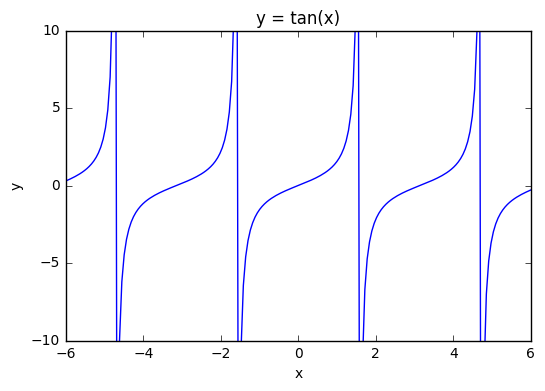

In [4]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

## Plot tan(x) over an appropriate x range.
x = linspace(-6., 6., 200)
y = tan(x)
plt.plot(x, y)

## Format the figure nicely.
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = tan(x)')
plt.ylim(-10., 10.);

Here is what the various lines of code do:

* The first line, `%matplotlib inline`, is a "magic line" that indicates to Jupyter that the plot should be embedded in the Jupyter notebook, rather than opening a new OS window.  (If you run the program as stand-alone Python code, outside Jupyter, this line should be omitted.)
* The next two lines are [Python import statements](https://docs.python.org/3/tutorial/modules.html) that load the Scipy (Scientific Python) and [Matplotlib-Pyplot](http://matplotlib.org/api/pyplot_api.html) modules.  **Modules** are what Python calls "programming libraries", and these particular ones provide specialized functions for scientific programming and plotting.<br/>*Technical note*: the contents of the `scipy` module are loaded directly into our program's namespace, whereas `matplotlib.pyplot` is assigned to the short-hand `plt`.  That's why, later in the program, we call Scipy's [`linspace`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) function directly as `linspace`, whereas Matplotlib's [`plot`](http://matplotlib.org/api/pyplot_api.html#plot) function is called as `plt.plot`.
* The next several lines generate arrays of $x$ and $y$ data.  They use the [`linspace`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) and [`tan`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.tan.html) functions, from the Scipy module (actually, they're from Numpy, or Numeric Python, of which Scipy is a superset; no need to worry about the distinction for now).
* Various functions from [`matplotlib.pyplot`](http://matplotlib.org/api/pyplot_api.html) are called to set the axis labels, plot title, etc.  (Note: in a stand-alone Python program, you would also need to add a final line, `plt.show()`, to open an OS window to actually show the plot. We don't need to do it here, because the figure is generated within the Jupyter notebook itself.)
* The last line ends with a semi-colon (`;`).  This is just a bit of sugar-coating to tell Jupyter to avoid displaying the return value of that final line (i.e., whatever is returned by the `plt.ylim` function call).  We don't need to see this return value, since we're only interested in seeing the plotted graph.  (If you like, try removing the semi-colon and running the program again, and see what difference it makes.)

### YouTube videos

You don't necessary need to use code cells for scientific programming and plotting.  You can put any general-purpose Python program in there.

For instance, you could have a program that displays a YouTube video player.  This effectively turns your Jupyter notebook into a document with embedded video! This is accomplished using the [<code>IPython.display.YouTubeVideo</code>](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#IPython.display.YouTubeVideo) class that's conveniently provided by the [`IPython.display` module](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html):

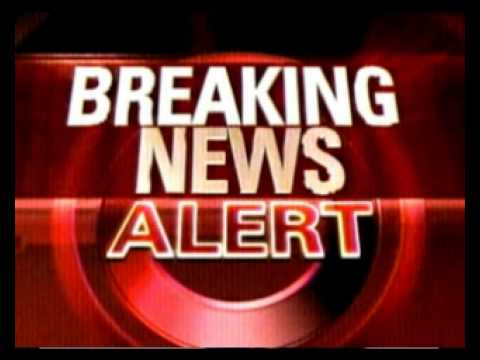

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("xfr64zoBTAQ", showinfo=1) # Replace string with desired YT video ID